# Exploring hyperparameters used in  2D  problem

Note: All experiments use the spread-out source as presented in the 2D benchmarking notebook. All examples use a $20\times20$ grid.

## Altering difference between $e_1$ and $e_2$

- Originally tested 

$e_1=10^{-3}$

$e_2=10^{-6}$


#### 1D Convolutional network (as described in 2D benchmarking notebook)

|$e_1$       	| $10^{-4}$	|  $10^{-5}$  	|
|---                |---	|---	|
|GMRES   	        |1835  	|1767 	|
|MLGMRES        	|835   	|819	|
|Training      	    |84   |77   	|
|MLGMRES/GMRES  	|0.46	|0.46  	|

#### 1 layer 2D Convolutional network (as described in 2D benchmarking notebook)
|$e_1$       	| $10^{-4}$	|  $10^{-5}$  	|
|---                |---	|---	|
|GMRES   	        |1781  	|1697 	|
|MLGMRES        	|990   	|942	|
|Training      	    |84   |91   	|
|MLGMRES/GMRES  	|0.56	|0.56  	|

#### Experiment summary

For the test problem, it seems that "when"(choice of coarse tolerance) we do the algorithmic restart does not significantly impact overall performance. **Moving on, we always set** $e_1=10^{-5}$

## Varying number of Epochs

**Note: Now we only look at 1-layer 2D convolutions here**

|Epochs      	    |500	|1000   	|2000|
|---                |---	|---	|---|
|GMRES   	        |1697  	|1740 	|1719 |
|MLGMRES        	|942   	|930	|840|
|Training      	    |91   |162   	|294|
|MLGMRES/GMRES  	|0.56	|0.53  	|0.49|

Here see the trade off between the number of iterations through our training loop and the corresponding speed-up. For the sake of consistenct, **moving forward we will only use 1000 epochs per training instance unless otherwise stated.**

## Varying optimizer 

Generally, the main optimizer used has been Adagrad which has same nice properties for online problems. Here we compare some of these optimizers to see how they perform. The usual online batched approach described is used here. 

**Note:500 Epochs are used per training instance**

|Optimizer      	|Adam	|RMSprop   	|SGD|Adagrad
|---                |---	|---	|---|---|
|GMRES   	        |1738  	|1762 	|1848  |1697|
|MLGMRES        	|1003   |1304	|1040  |942|
|Training      	    |83     |68   	|57    |91|
|MLGMRES/GMRES  	|0.58	|0.74  	|0.56  |0.56|

### Plots of coarse time-to-solution and second iteration error

Adam

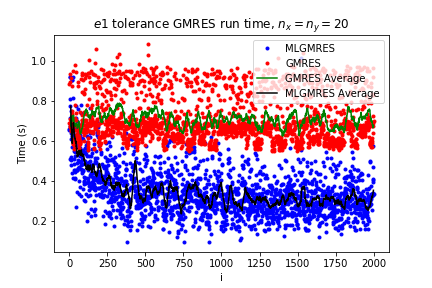

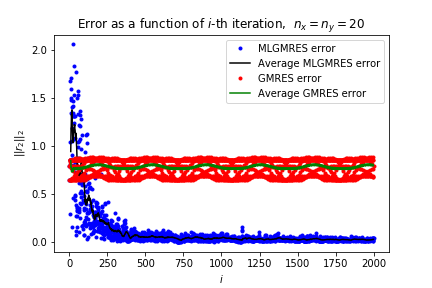

RMSprop

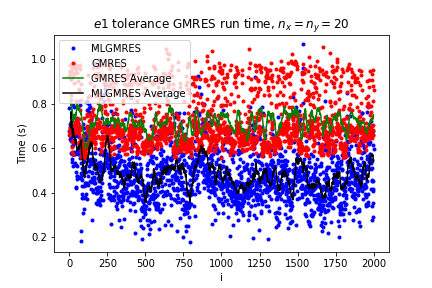

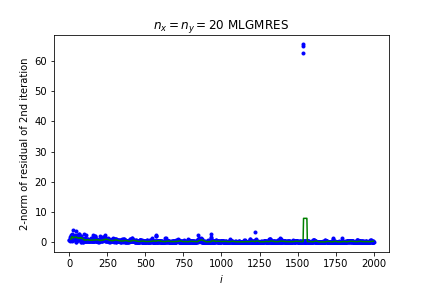

SGD

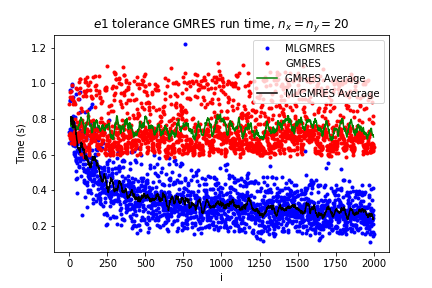

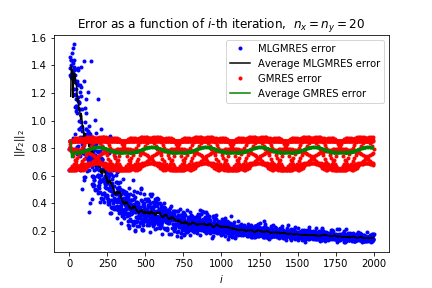

Adagrad

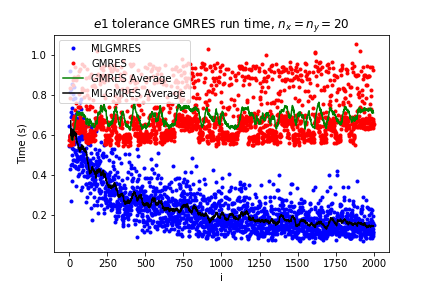

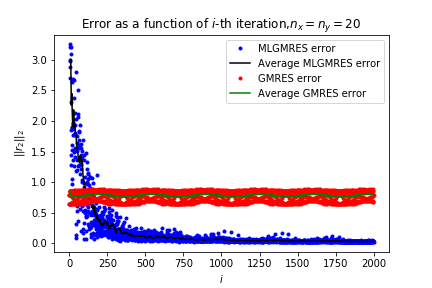

## Varying batch size  


**Note: Now we only look at 1-layer 2D convolutions from here onward**

With 500 epochs for each training instance, we now vary the batch size. Note that in these experiments we use the SGD optimizer. 

|Batch size      	|16	|32   	|64|
|---                |---	|---	|---|
|GMRES   	        |1698  	|1848 	|1730|
|MLGMRES        	|1010   |1040	|956 |
|Training      	    |49     |57   	|51   |
|MLGMRES/GMRES  	|0.59	|0.56  	|0.55 |

#### Runtime and error plots

16

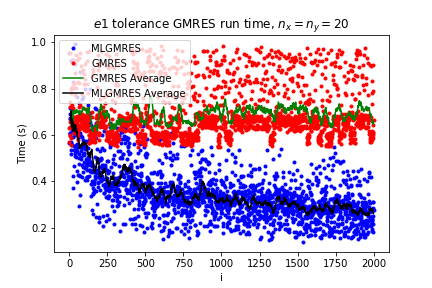

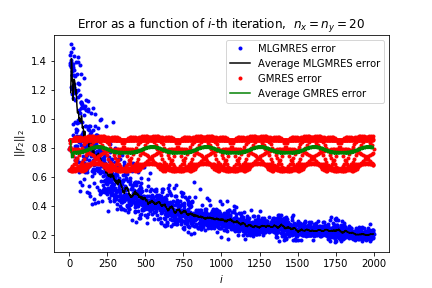

32

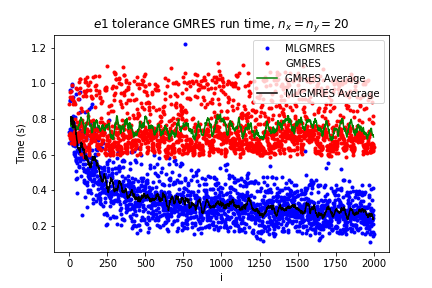

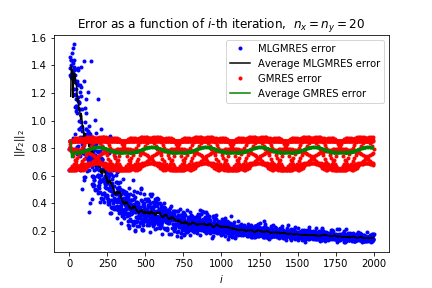

64

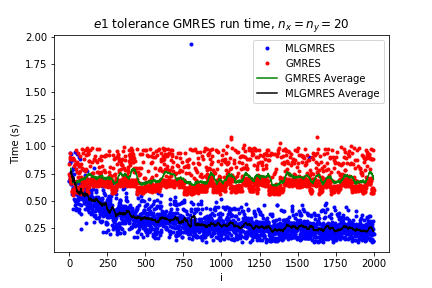

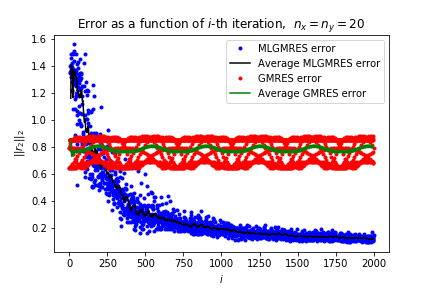

For what was attempted, doubling the batch sizes did not affect results much. **We will typically continue to use 32 batches**

## Modifying Online Batched Training Approach



To review, the way things are done up to this point are as follows: at some instance we have $N$ samples in our training set, and have $M$ new data points. We use batched gradient descent by randomly sampling the old data and make sure we include the $M$ data points in each batch. We do this in this way since the model at this instance have already been trained numerous times on the $N$ data points in the training set. The hope is that by weighing the current instance toward the new data points, we can improve learning. However, there is a concern that this may over emphasize new data between training instances. Here, we modify the training approach as follows: 

Suppose we have $N$ training samples in training set and $M$ new samples. What we do instead is construct a new training set $N'$ by adding these two sets, and then randomly sample this. Then, for the very last batch we gurantee that our $M$ new data points are in it.  This way, we are gurantee to train on our new data at least once, but do not overweigh it. 

#### 500 Epochs

|Online method       	|old	|New  	|
|---                |---	|---	|
|GMRES   	        |1697  	|1772 	|
|MLGMRES        	|943   	|961	|
|Training      	    |71   |84   	|
|MLGMRES/GMRES  	|0.56	|0.54  	|

#### 1000 Epochs

|Online method      |old	|New  	|
|---                |---	|---	|
|GMRES   	        |1740  	|1718 	|
|MLGMRES        	|943   	|903	|
|Training      	    |162    |149	|
|MLGMRES/GMRES  	|0.53	|0.52  	|

We see some slight improvements(or possiby just variation due to noise). So, it seems these distinction do not matter too much. However, this is not to say that the problem is insensitive to how we handle "online batched" training. For example, if we **only** include data in the final batch during the training instance, performance suffers. This will be tested more precisely at a later time. **Moving forward we use this "new" approach since it performs slightly better**.

## Impact of data Filter : $n$th iteration error

We select what data to add to training set depending both how the run-time and $nth$ iteration compare to a running average that is kept. Here we explore the effect of varying $n$. We want to see if our method is sensitive to the choice of $n$.

|$n$th error        |$0$th|$2$nd|$5th$  |$10th$|
|---                |---  |---  |---	|---   |
|GMRES   	        |1710 |1740 |1735 	|1849  |
|MLGMRES        	|929  |930 	|885	|1012  |
|Training      	    |133  |162  |163	|180   |
|MLGMRES/GMRES  	|0.54 |0.53	|0.51  	|0.55  |

The method we use does not seem to be particularly sensitive to $n$, but there is a slight dependence. 

## Impact of data Filter : Orthogonality cut-off

We use inner products between the normalized flattened solutions to check how "different" solutions are. An empirical cutoff is used to decide if a given set of flattened solutions are too similar. We check how our speed-up depend on this cut-off. For results so far, we have used $0.8$ as the cutoff. 

|cutoff       |$0.5$|$0.7$|$0.8$|$0.9$|
|---                |---  |---  |---	|---   |
|GMRES   	        |1805 |1690 |1718 	|1746  |
|MLGMRES        	|971  |920 	|903	|918  |
|Training      	    |164  |144  |149	|164   |
|MLGMRES/GMRES  	|0.54 |0.54	|0.53  	|0.53  |

We see that performance is not sensitive to the choice of this cut off. **So, we stick with a value of 0.8 as has been done**.

## Reducing 2D Kernel size

So far, our 2D convolutional layer has used a $19 \times19$ kernel. We reduce this, and see if we still get comperable performance. Here we simply compare this to a $5 \times 5$ kernel before exploring making the network deeper. 

|Kernel dim      	|$5$    |$19$ 	|
|---                |---	|---	|
|GMRES   	        |1735 	|1718  	|
|MLGMRES        	|1064	|920   	|
|Training      	    |131   	|144    |
|MLGMRES/GMRES  	|0.61  	|0.54	|

We see that the problem is somewhat sensitive to the kernel size. However, this smaller size makes it more feasible to add more layers to the network. So, we now explore the effect of making this network ($5\times5$ kernel) deeper. So far, we have only been working with a single 2D convolutional layer.

## Adding more 2DConv layers

For Kernel size $5 \times 5$ we see how performance varies with more layers

|# 2DConv layer      |1   |2    |3      |4|
|---                |---  |---  |---	|---   |
|GMRES   	        |1735 |1769 |1699 	|1833  |
|MLGMRES        	|1064  |907 |903	|1076  |
|Training      	    |131  |143  |173	|241   |
|MLGMRES/GMRES  	|0.61 |0.51	|0.53  	|0.59  |

From this experiment we see that more layers seem to help, but two layers seems to be optimal. 

## Varying Kernel size of 2 layer 2dConv network
Here, we investigate the effect of changing the kernel size of each layer. Note that every 2D kernel for each layer is square. What is meant by $(n,m)$ is that the first layer has a $(n,n)$ kernel, and the second layer has a $(m,m)$ kernel.

|Kernel sizes of 2 layers       |(3,3)|(5,5)|(7,7)|(9,9)|(11,11)|(19,19)|(7,9)|(9,7)|
|---                            |---  |---  |---  |---  |---    |---    |---  |---  |
|GMRES   	                    |1865 |1769 |1824 |1822 |1834   |1738   |1823 |1734 |
|MLGMRES        	            |1096 |907  |896  |887  |973    |1058   |890  |847  |
|Training      	                |179  |143  |165  |178  |176    |308    |192  |154  |
|MLGMRES/GMRES  	            |0.61 |0.51 |0.51 |0.49 |0.53   |0.61   |0.49 |0.49 |

We see that selecting a Kernel that is too big or too small tends to have inferrior performance. For this problem, it seems that a Kernel that is roughly $(\frac{n}{2},\frac{n}{2})$ for a grid of size $(n,n)$ seems to perform best. 